HW

In [437]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.tree import DecisionTreeClassifier
import sklearn
from skompiler import skompile

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from warnings import filterwarnings
filterwarnings('ignore')

# Decision Tree

# Decision Tree Classification

0=iyi , 1 = kötü

In [51]:
data = pd.read_csv("hmelq.csv")
df = data.copy()
df=df.dropna()

In [52]:
df.head(1)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056


In [53]:
data.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575
reason,HomeImp,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon,DebtCon,DebtCon,...,HomeImp,DebtCon,DebtCon,NaN,HomeImp,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon
job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Self,Self,Self,Self,Self,Self,Self,Self,Self,Self


Bunlar kategorik değişkenler olduğundan, karar ağacı sınıflandırmada kullanmak için  önce dummye çevirmemiz gerekir.

In [54]:
dummy_variable=pd.get_dummies(df[['reason','job']])

In [55]:
y=df['bad']

In [56]:
X_ = df.drop(['bad','reason','job'],axis=1).astype('float64')
X_.head(0)

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc


In [57]:
X = pd.concat((X_,dummy_variable),axis=1)
X.head(0).T

""
loan
mortdue
value
yoj
derog
delinq
clage
ninq
clno
debtinc


In [58]:
df.bad = [ "kötü" if i==1 else "iyi" for i in df.bad ]

In [10]:
X.shape

(2018, 18)

In [11]:
y.shape

(2018,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    random_state=42)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (1412, 18)
X_test shape (606, 18)
y_train shape (1412,)
y_test shape (606,)


### Model Tahmin

In [60]:
cart = DecisionTreeClassifier()

In [61]:
cart_model = cart.fit(X_train,y_train)

In [15]:
?cart_model

In [62]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[2] <= 36741.5 else (0 if x[1] <= 16220.0 else 1) if x[3] <= 
    7.0 else 0) if x[9] <= 32.76449966430664 else 0 if x[3] <= 1.5 else (1 if
    x[11] <= 0.5 else 0) if x[8] <= 6.0 else 1) if x[0] <= 12750.0 else 0 if
    x[7] <= 4.0 else 1) if x[2] <= 48600.0 else ((((((((((1 if x[9] <= 
    33.51150035858154 else 0) if x[1] <= 39828.0 else 1 if x[8] <= 8.0 else
    (1 if x[3] <= 2.5 else (0 if x[7] <= 2.5 else 1 if x[4] <= 0.5 else 0) if
    x[5] <= 0.5 else 1) if x[6] <= 71.81999969482422 else (0 if x[0] <= 
    9450.0 else 0 if x[3] <= 8.5 else 1) if x[10] <= 0.5 else 0) if x[2] <=
    85577.5 else 1) if x[6] <= 94.25 else 0 if x[2] <= 72614.0 else 1) if x
    [2] <= 86023.5 else (1 if x[14] <= 0.5 else 0) if x[8] <= 9.5 else 0) if
    x[6] <= 95.79000091552734 else (((0 if x[9] <= 32.614999771118164 else 
    1 if x[7] <= 1.5 else 0) if x[11] <= 0.5 else 0) if x[4] <= 0.5 else 0 if
    x[3] <= 4.5 else 1) if x[0] <= 6950.0 else (((((1 if x[0] <= 10300.0 else
    0 if x[

* 45<x --> 1
* 45>x and 61< --> 0 değilse 1

In [63]:
y_pred = cart_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.929042904290429

##### 93%

### Model Tuning

In [19]:
cart_model

DecisionTreeClassifier()

In [76]:
?cart_model

In [125]:
cart_grid = {"max_depth": range(1,10), 
             "min_samples_split": list(range(2,50))}

In [126]:
cart_cv = GridSearchCV(cart,cart_grid, cv = 10, n_jobs=-1,verbose=2)
cart_cv_model = cart_cv.fit(X_train , y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 4305 out of 4320 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    7.7s finished


In [114]:
print("En iyi parametreler:" + str(cart_cv_model.best_params_))

En iyi parametreler:{'max_depth': 4, 'min_samples_split': 3}


#final

In [123]:
cart = tree.DecisionTreeClassifier(max_depth = 2 , min_samples_split=4)
cart_tuned = cart.fit(X_train, y_train)

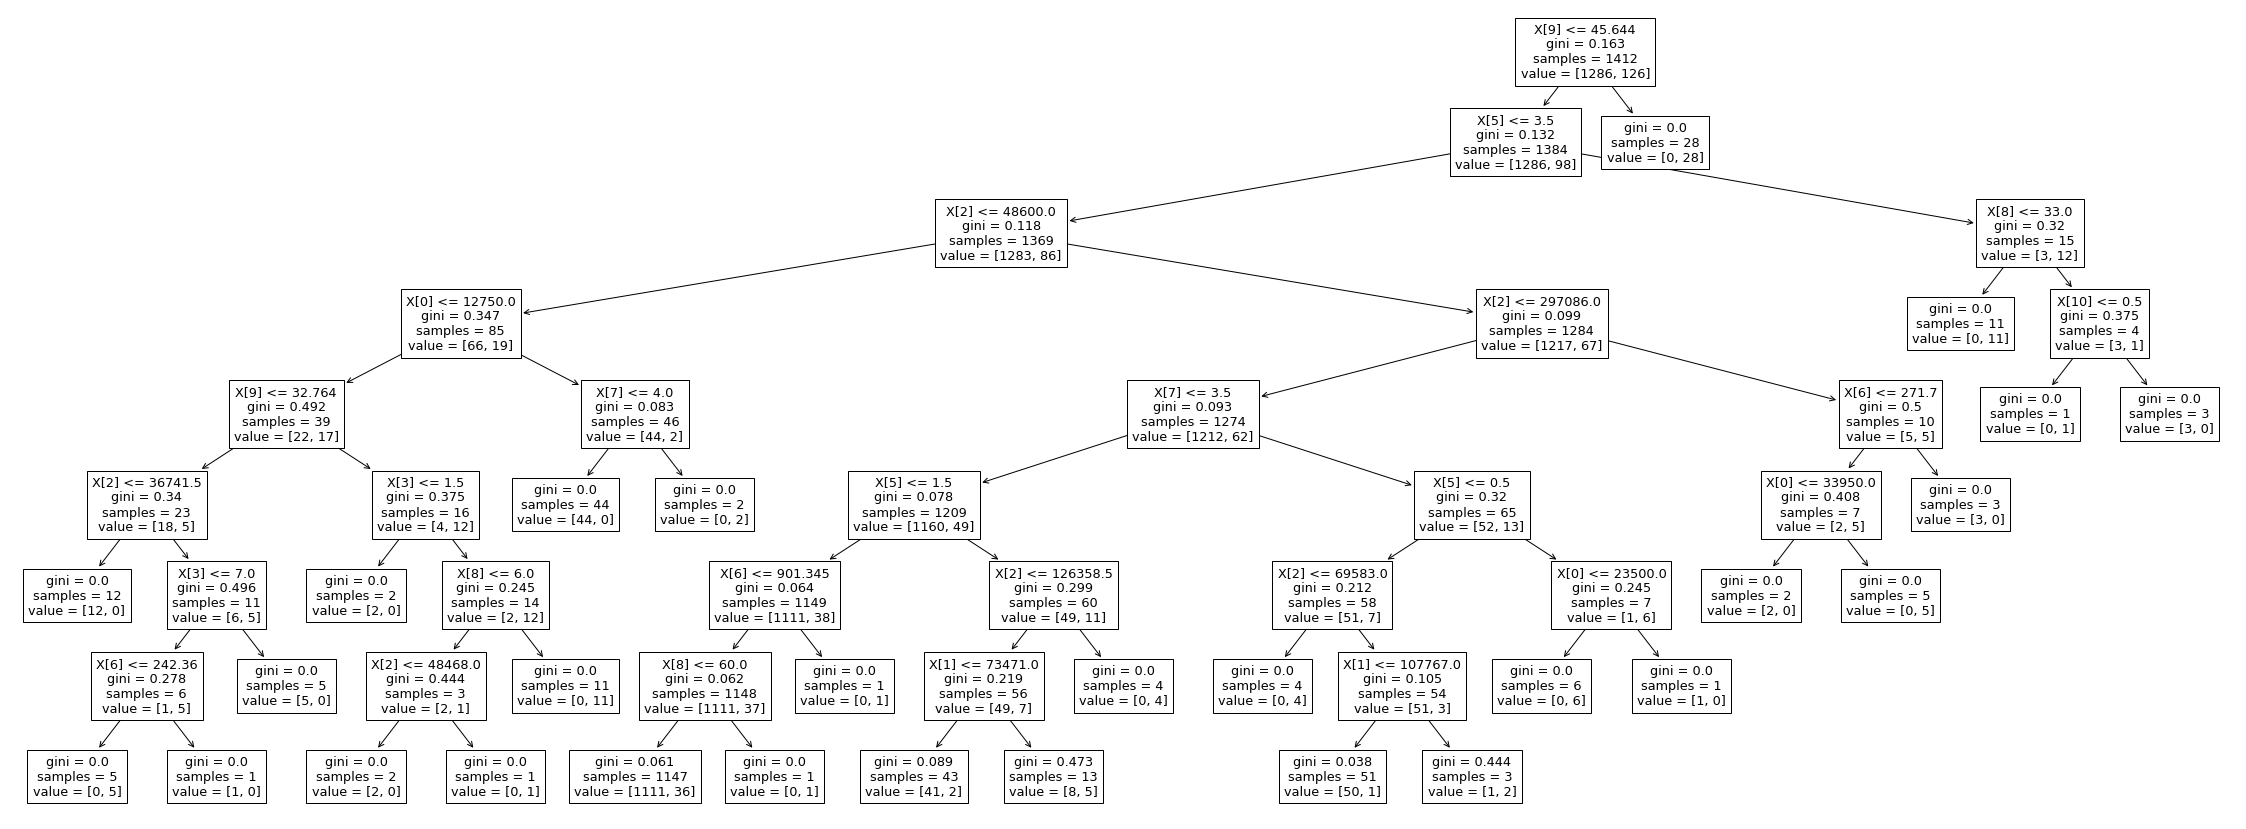

In [104]:
plt.figure(figsize=(40,15))
tree.plot_tree(cart_tuned);

In [124]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.933993399339934

### Manuel Tree

In [135]:
manuel_tree = df.copy()
manuel_tree


y_mt = manuel_tree['bad']
X_mt = manuel_tree.drop(['bad','reason','job'],axis=1).astype('float64')
X_mt.head(0)

X_mt.head(0)

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc


In [139]:
X_mt.drop(['clage'],axis=1).head(0)

,loan,mortdue,value,yoj,derog,delinq,ninq,clno,debtinc


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_mt,y_mt,
                                                    test_size=0.30,
                                                    random_state=42)

In [141]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train,y_train)
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[2] <= 36741.5 else (0 if x[1] <= 16220.0 else 1) if x[3] <= 
    7.0 else 0) if x[9] <= 32.76449966430664 else 0 if x[3] <= 1.5 else (0 if
    x[6] <= 120.83999633789062 else 1) if x[8] <= 6.0 else 1) if x[0] <= 
    12750.0 else 0 if x[7] <= 4.0 else 1) if x[2] <= 48600.0 else (((1 if x
    [8] <= 1.5 else ((((((1 if x[9] <= 33.51150035858154 else 0) if x[1] <=
    39828.0 else 1 if x[8] <= 8.0 else (1 if x[3] <= 2.5 else (0 if x[7] <=
    2.5 else 1 if x[8] <= 22.0 else 0) if x[5] <= 0.5 else 1) if x[6] <= 
    71.81999969482422 else (0 if x[0] <= 9450.0 else 0 if x[1] <= 50815.5 else
    1) if x[0] <= 9550.0 else 0) if x[2] <= 85577.5 else 1) if x[6] <= 
    94.25 else 0 if x[2] <= 72614.0 else 1) if x[2] <= 86023.5 else (1 if x
    [7] <= 0.5 else 0) if x[8] <= 9.5 else 0) if x[6] <= 95.79000091552734 else
    (((0 if x[0] <= 6800.0 else 1) if x[6] <= 101.53499984741211 else 0 if 
    x[2] <= 121453.5 else 0 if x[9] <= 26.64699935913086 else 1) if x[4] <=
    0.5 else 

In [143]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9207920792079208

In [144]:
cart_grid = {"max_depth": range(1,10), 
             "min_samples_split": list(range(2,50))}

cart_cv = GridSearchCV(cart,cart_grid, cv = 10, n_jobs=-1,verbose=2)
cart_cv_model = cart_cv.fit(X_train , y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 4185 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   10.1s finished


In [150]:
cart = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split=2)
cart_tuned = cart.fit(X_train, y_train)

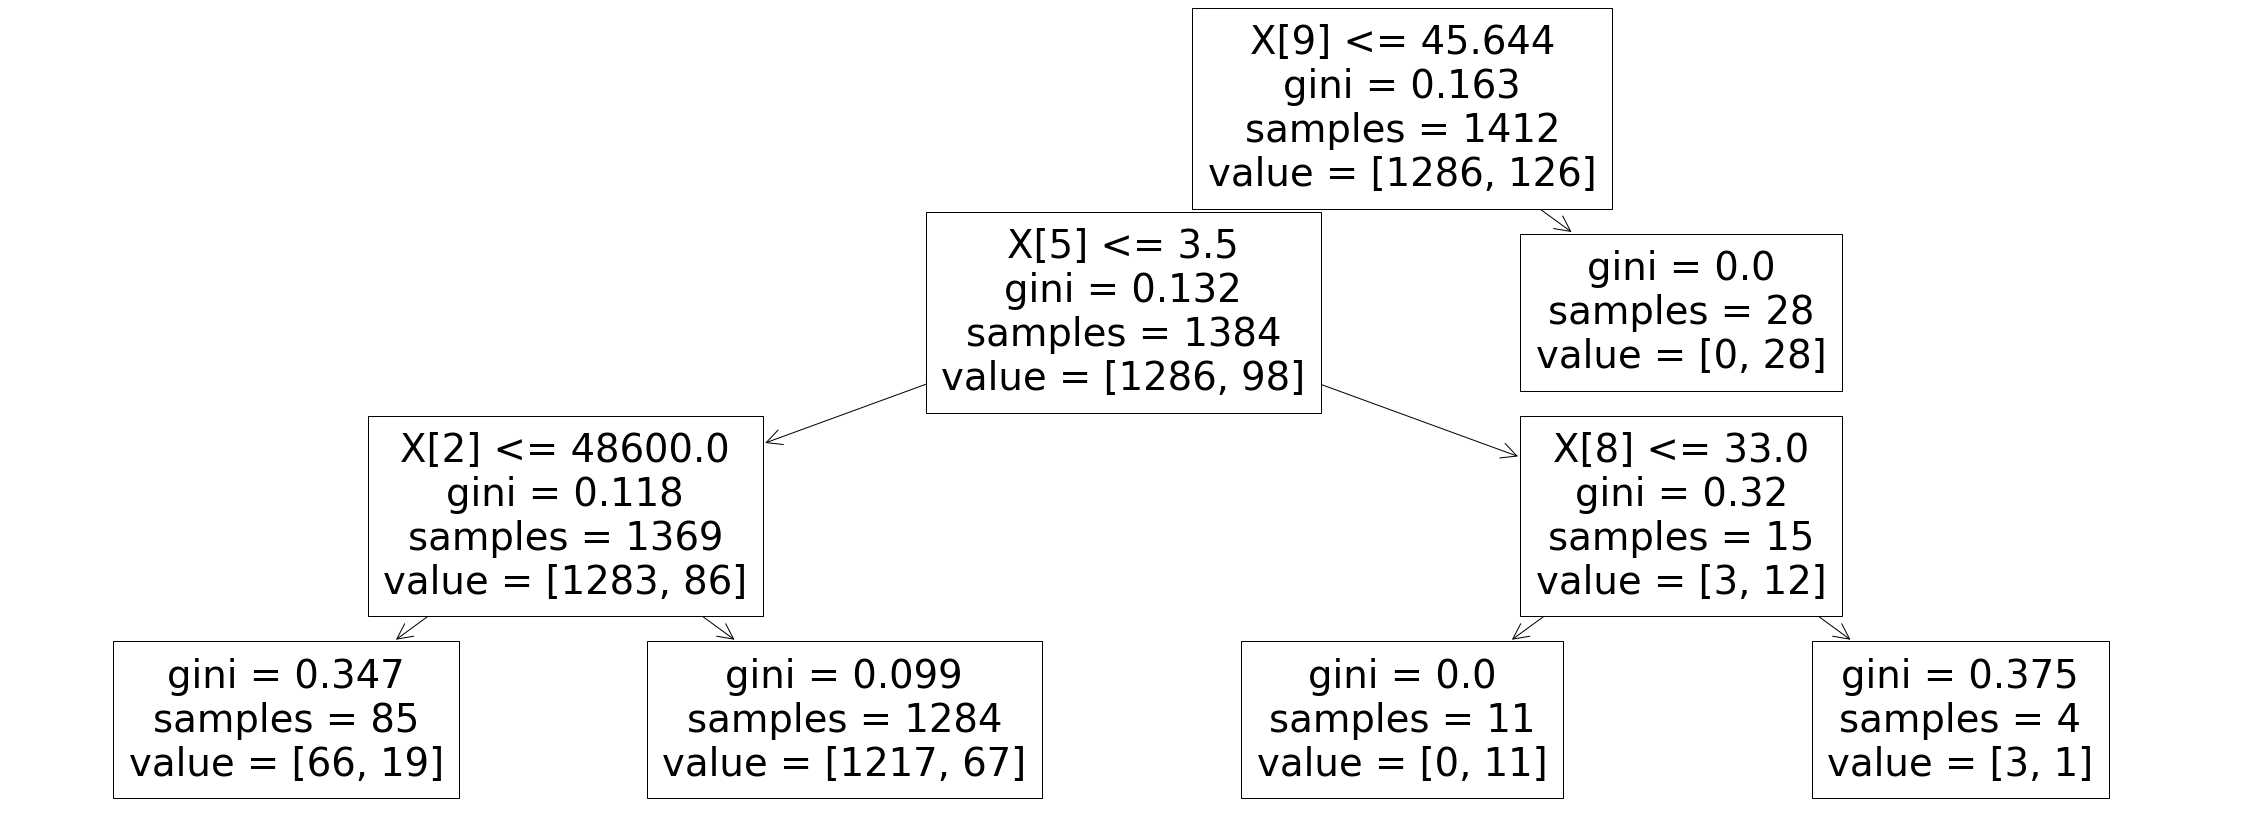

In [151]:
plt.figure(figsize=(40,15))
tree.plot_tree(cart_tuned);

In [153]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9389438943894389

***

# DESICION TREE REGRESSION

In [281]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()

In [282]:
df = df.replace('?',np.NaN)

In [283]:
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [285]:
df.select_dtypes(include=['float64','int64'])
df.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166
ind_109,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,RED,RED,...,GREEN,GREEN,GREEN,GREEN,RED,RED,RED,GREEN,GREEN,GREEN


In [356]:
y_dt = df['90_target']

dummy_dt =  pd.get_dummies(df['ind_109'])

X_dt = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422"],axis=1)
X_dt.head(0)

X_dt =pd.concat([X_dt,dummy_dt],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.30,
                                               random_state=42)

***

In [337]:
from sklearn.tree import DecisionTreeRegressor

In [338]:
cart_model = DecisionTreeRegressor() 

In [357]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [330]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [340]:
y_pred = cart_model.predict(X_test)

In [358]:
print('MSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test, y_pred))

MSE:  0.23557275207133196
R2:  0.29257199026820224


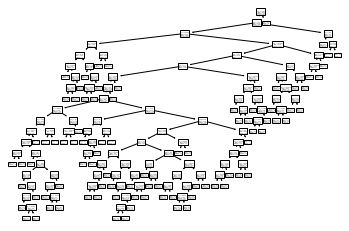

In [314]:
tree.plot_tree(cart_model);

## Model Tuning

In [359]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [360]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2755133222896416

MSE: 
* 0.2814390178921167 ' di
* 0.2784919312575816 oldu


In [361]:
cart_params = {"min_samples_split": range(10,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,8)}

In [362]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10, n_jobs=-1, verbose=2)

In [363]:
cart_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 3584 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   10.0s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_leaf_nodes': range(4, 8),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': range(10, 50)},
             verbose=2)

In [349]:
cart_cv_model.best_params_

{'max_leaf_nodes': 7, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [350]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=7, 
                                   min_samples_leaf=10, 
                                   min_samples_split=10)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)

In [351]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.23557275207133196

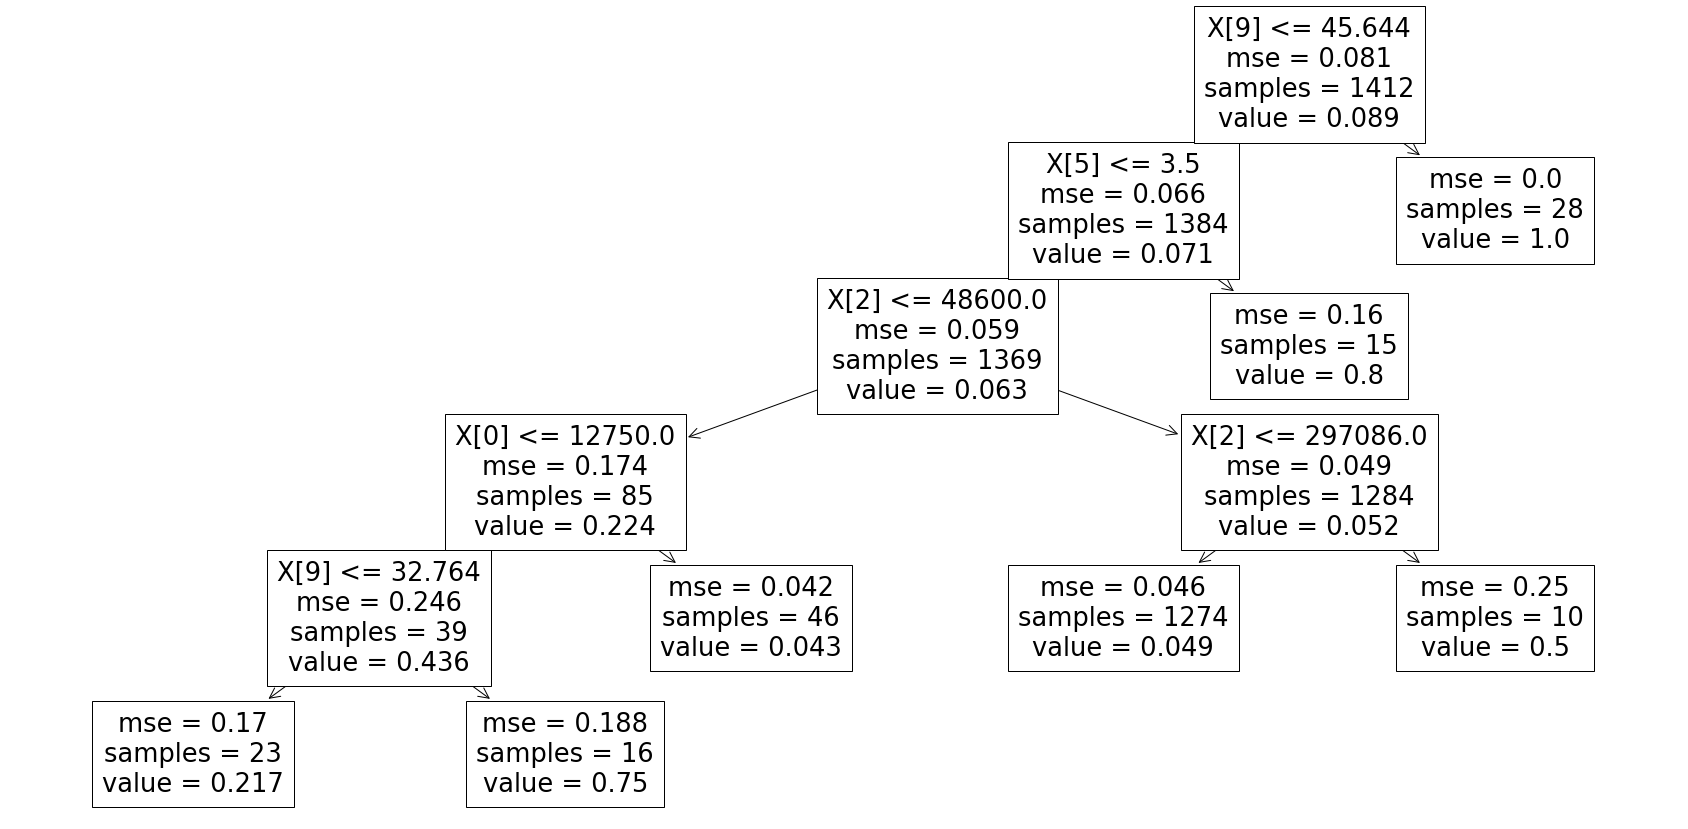

In [352]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

***

# RANDOM FOREST

# RANDOM FOREST CLASSIFICATION

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
data = pd.read_csv("hmelq.csv")
df_ = data.copy()
df_ = df_.dropna()

In [161]:
y_rfc = df_['bad']

dummy_rfc=pd.get_dummies(df_[['reason','job']])
X_rfc = df_.drop(['bad','reason','job'],axis=1).astype('float64')
X_rfc.head(0)

X_rfc_ = pd.concat((X_rfc,dummy_rfc),axis=1)

In [162]:
xtrain, xtest, ytrain, ytest = train_test_split(X_rfc_,y_rfc,
                                                test_size=0.30,
                                                random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1412, 18), (606, 18), (1412,), (606,))

In [171]:
# 50 tree 
rf_model = RandomForestClassifier(n_estimators=50).fit(xtrain, ytrain)
rf_model

RandomForestClassifier(n_estimators=50)

In [168]:
?rf_model

# default=100
# default gini

In [172]:
y_pred = rf_model.predict(xtest)
accuracy_score(ytest, y_pred)

0.9488448844884488

In [183]:
# 500 tree
rf_model = RandomForestClassifier(n_estimators=500).fit(xtrain, ytrain)
rf_model

RandomForestClassifier(n_estimators=500)

In [184]:
y_pred = rf_model.predict(xtest)
accuracy_score(ytest, y_pred)

0.9521452145214522

In [207]:
rf_model = RandomForestClassifier().fit(xtrain, ytrain)
rf_model

RandomForestClassifier()

In [208]:
y_pred = rf_model.predict(xtest)
accuracy_score(ytest, y_pred)

0.9521452145214522

### Model Tuning

In [214]:
rf_params = {"max_depth": [2,9,12,15],
             "max_features": [2,5,8],
             "n_estimators": [50,80,150],
             "min_samples_split": [5,10]}

In [215]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_cv_model.fit(xtrain, ytrain)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 525 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   36.9s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 9, 12, 15], 'max_features': [2, 5, 8],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 80, 150]},
             verbose=2)

In [218]:
rf_cv_model.best_params_

{'max_depth': 12,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

### Tuned

In [219]:
rf_tuned = RandomForestClassifier(max_depth=12,
                                  max_features= 5,
                                  min_samples_split= 5,
                                  n_estimators= 50)
rf_tuned.fit(xtrain, ytrain)
y_pred = rf_tuned.predict(xtest)
accuracy_score(ytest, y_pred)

0.9504950495049505

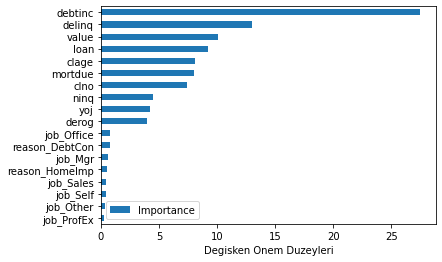

In [220]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = xtrain.columns)

Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh")
plt.xlabel("Degisken Onem Duzeyleri")
plt.show()

# Random Forest Regression

In [382]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()

df = df.replace('?',np.NaN)

df.isnull().sum().sort_values(ascending=False)

df.select_dtypes(include=['float64','int64'])
df.select_dtypes(include=["object"]).head(2)

,ind_109
0,GREEN
1,GREEN


In [400]:
dummy_rfr =  pd.get_dummies(df['ind_109'])
y_rfr = df['90_target']

X_rfr = df.drop(["20_target","50_target","90_target", 
                 "ind_420", "ind_422", 'ind_109'],axis=1).astype("float64")

X_rfr =pd.concat([X_rfr,dummy_rfr],axis=1)


X_train,X_test,y_train,y_test=train_test_split(X_rfr,y_rfr,
                                               test_size=0.30,
                                               random_state=42)

In [401]:
from sklearn.ensemble import RandomForestRegressor

In [402]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

####  Tahmin

In [403]:
y_pred = rfr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

16.0138671212887

#### Tuning

In [404]:
rfr_params = {"max_depth": list(range(1,5)),
              "max_features": [3,5,7],
              "n_estimators": [10,20,50]}
rfr_model = RandomForestRegressor(random_state=42)

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   10.3s finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4], 'max_features': [3, 5, 7],
                         'n_estimators': [10, 20, 50]},
             verbose=2)

In [405]:
rfr_cv_model.best_params_

{'max_depth': 4, 'max_features': 7, 'n_estimators': 10}

In [408]:
rfr_tuned = RandomForestRegressor(max_depth=4,
                                  max_features=3,
                                  n_estimators=10)
rfr_tuned.fit(X_train, y_train)
y_pred = rfr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

35.13637239288187

In [415]:
importance = pd.DataFrame({"Importance": rfr_tuned.feature_importances_*100},
                          index=X_train.columns)

In [416]:
importance.head()

,Importance
ind_5,0.000000
ind_6,0.000000
ind_8,0.000000
ind_9,0.000000
ind_10,0.295417


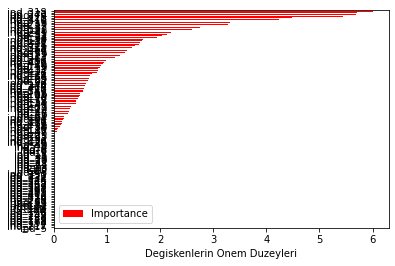

In [417]:
importance.sort_values(by="Importance", axis=0, 
                       ascending=True, na_position='last').plot(kind="barh", color="r")
plt.xlabel("Degiskenlerin Onem Duzeyleri")
plt.show()

# NEURAL NETWORK

# NEURAL NETWORK CLASSIFICATION

In [221]:
data = pd.read_csv("hmelq.csv")
_df = data.copy()
_df = _df.dropna()

In [227]:
y_nn = df_['bad']
X_nn = df.drop(["bad"],axis=1)

dummy_nn=pd.get_dummies(df_[['reason','job']])
X_nn = df_.drop(['bad','reason','job'],axis=1).astype('float64')
X_nn.head(0)

X_nn = pd.concat((X_nn,dummy_nn),axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(X_nn,y_nn,
                                                test_size=0.30,
                                                random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1412, 18), (606, 18), (1412,), (606,))

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
x_train_scaled = scaler.transform(xtrain)

scaler.fit(xtest)
x_test_scaled = scaler.transform(xtest)

### Model 1

In [233]:
from sklearn.neural_network import MLPClassifier

In [236]:
mlp_model = MLPClassifier(hidden_layer_sizes=(120,30)).fit(x_train_scaled, ytrain)
mlp_model

MLPClassifier(hidden_layer_sizes=(120, 30))

In [237]:
y_pred = mlp_model.predict(x_test_scaled)
accuracy_score(ytest,y_pred)

0.9372937293729373

In [242]:
mlp_param2 = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(30,30,30),
                                    (40,40), 
                                    (100,150,200), 
                                    (300,200,200),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","tanh"],
             "solver": ["lbfgs", "adam","sgd"]}


mlp_cv_model = GridSearchCV(mlp_model, mlp_param2, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(x_train_scaled, ytrain)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 18.7min finished


GridSearchCV(cv=10, estimator=MLPClassifier(hidden_layer_sizes=(120, 30)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(30, 30, 30), (40, 40),
                                                (100, 150, 200),
                                                (300, 200, 200), (3, 5),
                                                (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [244]:
mlp_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (100, 150, 200),
 'solver': 'adam'}

In [258]:
mlp_tuned = MLPClassifier(alpha= 0.02, 
                          hidden_layer_sizes=(300,200,150), 
                          activation="relu", solver="adam")
mlp_tuned.fit(x_train_scaled, ytrain)
y_pred = mlp_tuned.predict(x_test_scaled)
accuracy_score(ytest,y_pred)

0.9455445544554455

# NEURAL NETWORK REGRESSION¶

In [418]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()

df = df.replace('?',np.NaN)

df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [419]:
df.select_dtypes(include=['float64','int64'])
df.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166
ind_109,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,RED,RED,...,GREEN,GREEN,GREEN,GREEN,RED,RED,RED,GREEN,GREEN,GREEN


In [420]:
dummy_nnr =  pd.get_dummies(df['ind_109'])

y_nnr = df['90_target']

X_nnr = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422", 'ind_109'],
                axis=1).astype("float64")

X_nnr =pd.concat([X_nnr,dummy_nnr],axis=1)


X_train,X_test,y_train,y_test=train_test_split(X_nnr,y_nnr,
                                               test_size=0.30,
                                               random_state=42)

In [421]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
x_test_scaled = scaler.transform(X_test)

In [422]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaled, y_train)
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [423]:
mlp_model.n_layers_

4

In [424]:
mlp_model.hidden_layer_sizes

(100, 20)

### Tahmin

In [425]:
y_pred = mlp_model.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

22.313263822166306

### Model Tuning

In [426]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 16.9min finished


GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]},
             verbose=2)

In [427]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200, 150)}

### Tuned

In [432]:
mlp_tuned = MLPRegressor(alpha= 0.01, hidden_layer_sizes=(100,50,150), activation="relu")
mlp_tuned.fit(x_train_scaled, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 50, 150))

In [433]:
y_pred = mlp_tuned.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

24.007751175619223

## Implementing with Keras Library

In [435]:
# Import Keras 
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier #Datasetini sınıflandırma için

from sklearn.model_selection import cross_val_score # Datayı test ve train olarak bölme oranı 

from keras.models import Sequential # Sinir ağını import etme

from keras.layers import Dense # Layerları build etme

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [434]:
# Sinir Ağını oluşturma
def build_classifier():
    model = Sequential() # initialize neural network
    
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    model.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # model fitting 
    model.fit(x_train, y_train)
    
    return model


model = KerasClassifier(build_fn = build_classifier, epochs = 125)

# birden fazla accurarci elde etme,
# bu accurarcilerin ortalamasını alarak daha efektik bir sonuc elde edebiliriz

NameError: name 'KerasClassifier' is not defined

In [ ]:
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()

variance = accuracies.std()

print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

for i in accuracies:
    print("** \n Accurarcies",i)